In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
#CHECKING IF THERE ARE ANY NULL VALUES
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [7]:
# Step 1: basic checks
df_shape = df.shape
print('rows, cols =', df_shape)
display(df.info())
display(df.describe(include='all').transpose())
# Normalize column names for safer coding later
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()
df.columns.tolist()


rows, cols = (9994, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order ID,9994,9994,OD9994,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,50,Amrish,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9994,7,Snacks,1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub Category,9994,23,Health Drinks,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,24,Kanyakumari,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,1236,09-05-2017,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,9994,5,West,3203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9994.0,NaN,NaN,NaN,1496.596158,577.559036,500.0,1000.0,1498.0,1994.75,2500.0
Discount,9994.0,NaN,NaN,NaN,0.226817,0.074636,0.1,0.16,0.23,0.29,0.35
Profit,9994.0,NaN,NaN,NaN,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95


['order_id',
 'customer_name',
 'category',
 'sub_category',
 'city',
 'order_date',
 'region',
 'sales',
 'discount',
 'profit',
 'state']

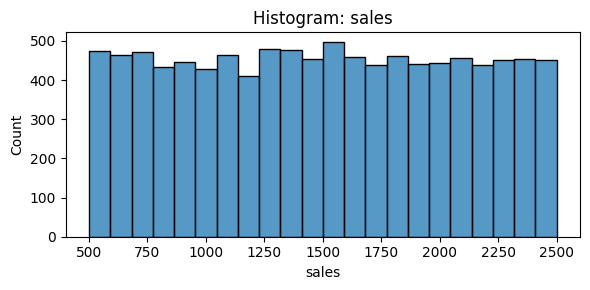

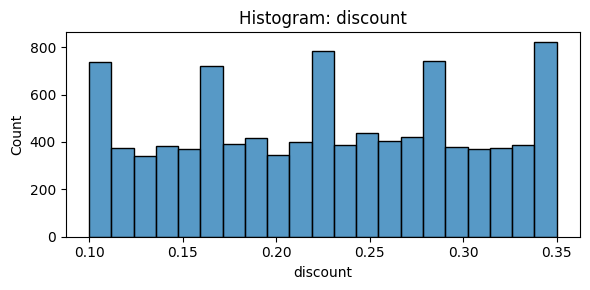

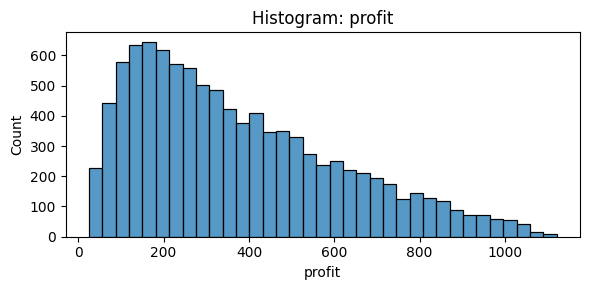

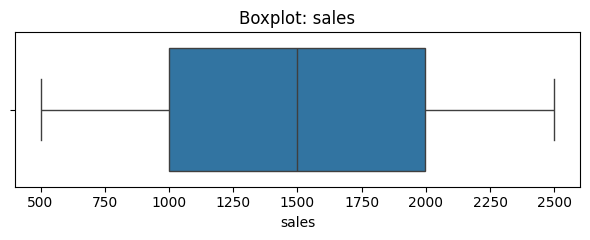

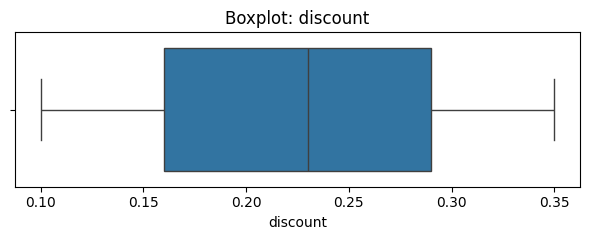

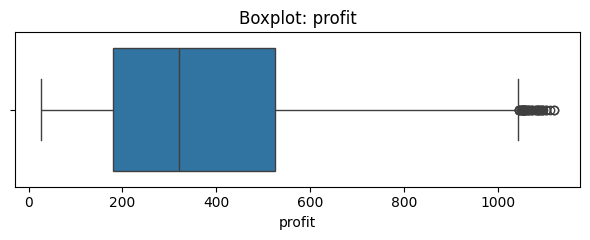

In [14]:
# Step 5: distributions
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()

# Quick numeric histograms (first 8)
for c in num_cols[:8]:
    plt.figure(figsize=(6,3))
    sns.histplot(df[c].dropna(), kde=False)
    plt.title(f'Histogram: {c}')
    plt.tight_layout()
    plt.show()

# Boxplots to check spread / outliers
for c in num_cols[:8]:
    plt.figure(figsize=(6,2.5))
    sns.boxplot(x=df[c].dropna())
    plt.title(f'Boxplot: {c}')
    plt.tight_layout()
    plt.show()




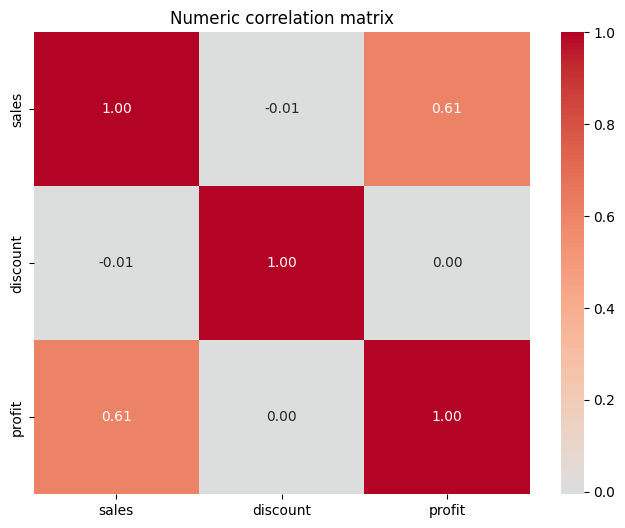

,sales,discount,profit
sales,1.000000,-0.005512,0.605349
discount,-0.005512,1.000000,0.000017
profit,0.605349,0.000017,1.000000


In [13]:
# Step 6: correlations
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Numeric correlation matrix')
    plt.show()
    display(corr)
else:
    print('Not enough numeric columns for correlation heatmap.')


In [17]:
# Category-level total sales & profit
cat_sales = df.groupby("category")[["sales", "profit"]].sum().reset_index()
print("\nCategory-wise Sales & Profit:\n", cat_sales)

# Sub-category average sales & profit
subcat_sales = df.groupby("sub_category")[["sales", "profit"]].mean().reset_index()
print("\nSub-Category-wise Avg Sales & Profit:\n", subcat_sales)

# Region-level total sales & profit
region_sales = df.groupby("region")[["sales", "profit"]].sum().reset_index()
print("\nRegion-wise Sales & Profit:\n", region_sales)

# State-level top 10 by sales
state_sales = df.groupby("state")[["sales", "profit"]].sum().reset_index().sort_values(by="sales", ascending=False).head(10)
print("\nTop 10 States by Sales:\n", state_sales)

# Profit margin at category level
df["profit_margin"] = df["profit"] / df["sales"]
cat_margin = df.groupby("category")["profit_margin"].mean().reset_index()
print("\nCategory-wise Avg Profit Margin:\n", cat_margin)




Category-wise Sales & Profit:
             category    sales     profit
0             Bakery  2112281  528521.06
1          Beverages  2085313  525605.76
2  Eggs, Meat & Fish  2267401  567357.22
3        Food Grains  2115272  529162.64
4   Fruits & Veggies  2100727  530400.38
5       Oil & Masala  2038442  497895.29
6             Snacks  2237546  568178.85

Sub-Category-wise Avg Sales & Profit:
           sub_category        sales      profit
0         Atta & Flour  1514.586402  362.212748
1             Biscuits  1490.376906  368.970850
2        Breads & Buns  1479.254980  380.009920
3                Cakes  1516.840708  372.562965
4              Chicken  1495.681034  356.465201
5           Chocolates  1470.737475  368.435551
6              Cookies  1477.332692  366.622500
7        Dals & Pulses  1525.862974  379.685977
8    Edible Oil & Ghee  1481.343681  373.821685
9                 Eggs  1517.562005  381.714828
10                Fish  1519.100271  399.046098
11        Fresh Fruits  

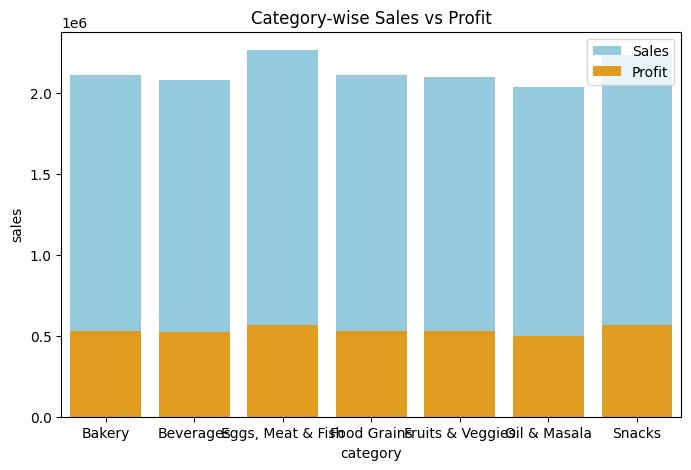

C:\Users\KUNAL RAO\AppData\Local\Temp\ipykernel_7928\496349044.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby("region")[["sales"]].sum().reset_index(),


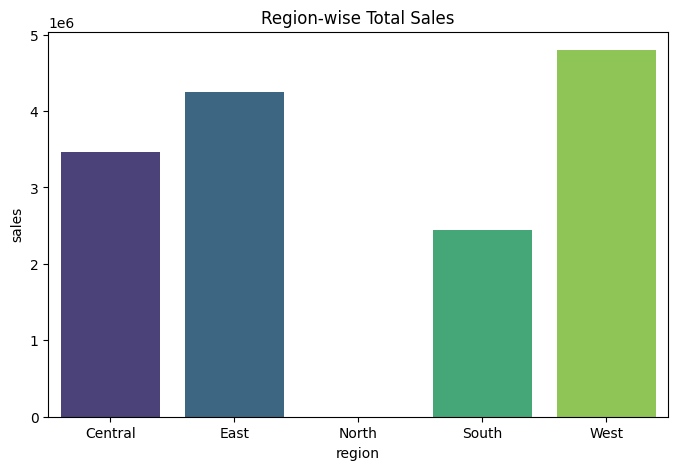

C:\Users\KUNAL RAO\AppData\Local\Temp\ipykernel_7928\496349044.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_subcat, x="sales", y="sub_category", palette="mako")


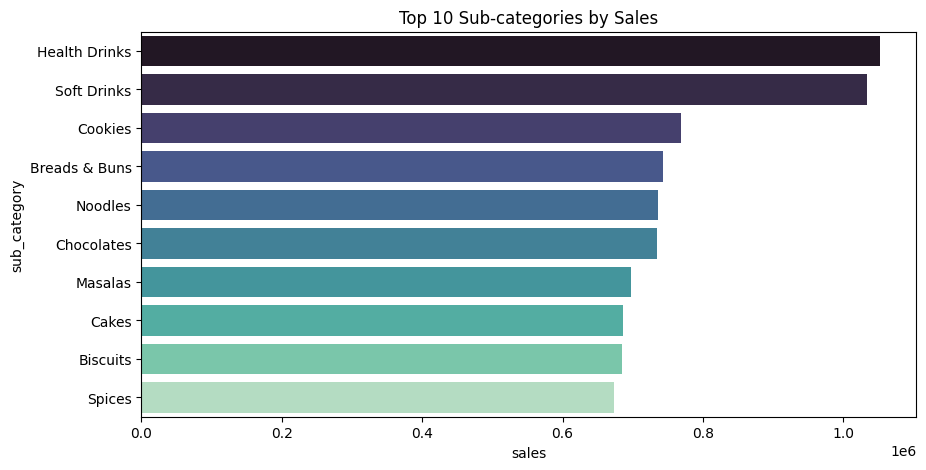

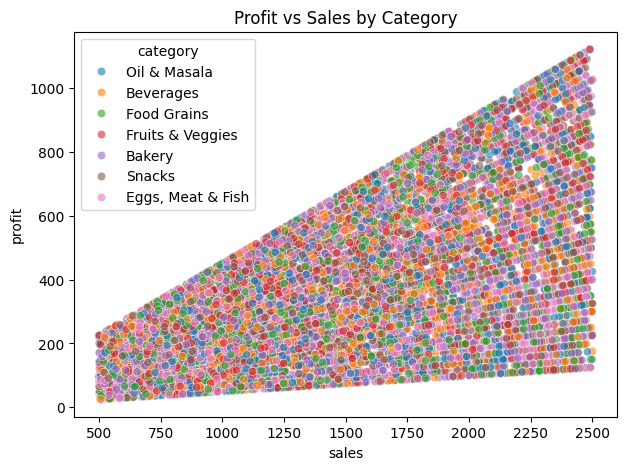

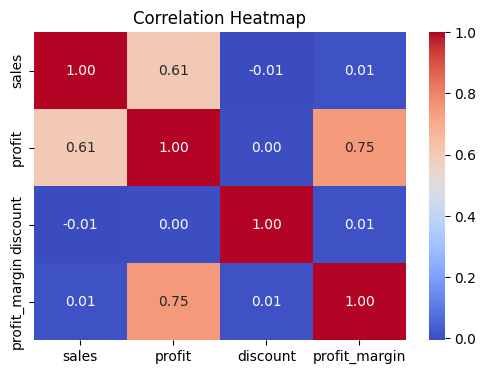

In [19]:
# --- Category-wise Sales & Profit ---
plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby("category")[["sales","profit"]].sum().reset_index(),
            x="category", y="sales", color="skyblue", label="Sales")
sns.barplot(data=df.groupby("category")[["sales","profit"]].sum().reset_index(),
            x="category", y="profit", color="orange", label="Profit")
plt.title("Category-wise Sales vs Profit")
plt.legend()
plt.show()

# --- Region-wise Sales ---
plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby("region")[["sales"]].sum().reset_index(),
            x="region", y="sales", palette="viridis")
plt.title("Region-wise Total Sales")
plt.show()

# --- Top 10 Sub-categories by Sales ---
top_subcat = df.groupby("sub_category")[["sales"]].sum().reset_index().sort_values(by="sales", ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_subcat, x="sales", y="sub_category", palette="mako")
plt.title("Top 10 Sub-categories by Sales")
plt.show()

# --- Scatter: Profit vs Sales ---
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="sales", y="profit", hue="category", alpha=0.6)
plt.title("Profit vs Sales by Category")
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(6,4))
sns.heatmap(df[["sales","profit","discount","profit_margin"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

